最初に重ね合わせの状態を紹介します。<br>
最もよく見る重ね合わせは、次の状態です。

$\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$

これは、$|0\rangle$と$|1\rangle$が$1/2$ずつ混ざった状態とは異なります。前者はアダマール基底で測定した場合確率$1$で$|+\rangle$が測定されますが、後者では$|+\rangle$と$|1\rangle$がそれぞれ$1/2$の確率で測定されます。

前者は純粋状態、後者は混合状態と呼ばれます。

それらを統一的に扱うには密度行列が便利です。純粋状態$|\psi_i\rangle$が割合$p_i$で混ざった混合状態は密度行列

$\rho = \sum_i p_i |\psi_i\rangle \langle\psi_i|$

と表現されます。

純粋状態$\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$は

$\rho_{pure} = \frac{1}{2}
\left|
\begin{array}{rr}
1 & 1 \\
1 & 1 \\
\end{array}
\right|
$

混合状態 - $|0\rangle$と$|1\rangle$が$1/2$ずつ混ざった状態は

$\rho_{mix} = \frac{1}{2}
\left|
\begin{array}{rr}
1 & 0 \\
0 & 1 \\
\end{array}
\right|
$

と書くことができます。

それでは回路で純粋状態を作成します。

紹介した純粋状態はアダマールゲートを用いることで作成できます。

シミュレータの"azxm_simulator"で実行します。

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [4]:
def get_count(qc, back_end="qasm_simulator", shots = 1024):
    back_end = Aer.get_backend(back_end)
    results = execute(qc, backend=back_end, shots=shots).result()
    count_num = results.get_counts()
    return count_num

{'1': 523, '0': 501}


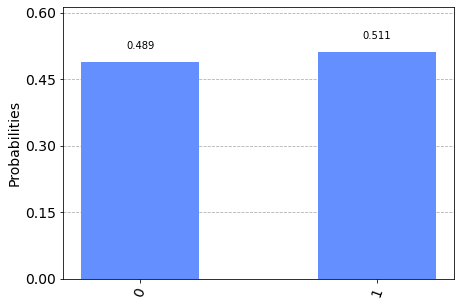

In [5]:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
qc.draw(output="mpl")

#execute by qasm_simulator
count_num = get_count(qc)
print(count_num)
plot_histogram(count_num)

つぎに、量子もつれ(エンタングルメント)を紹介します。
エンタングルとは２つの量子ビットの状態$|\psi\rangle_A$と$|\psi\rangle_B$からなる状態$|\Psi\rangle_{AB}$が個別の量子状態のテンソル積で書き表せない状態のことを指します。

以下では次のもつれ状態を生成します。

$\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle$

次のコードと回路で実現されます。

{'11': 519, '00': 505}


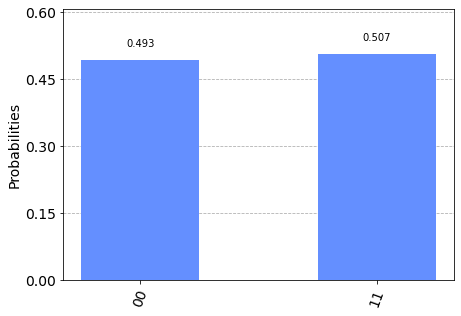

In [6]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
for i in range(2):
    qc.measure(i , i)
qc.draw(output="mpl")

count_num = get_count(qc)
print(count_num)
plot_histogram(count_num)

最後に3量子がもつれているGHZ状態を紹介します。以下の式で書き表されます。

$\frac{1}{\sqrt{2}}(|000 \rangle + |000\rangle )$

以下の回路で実現されます。

{'111': 500, '000': 524}


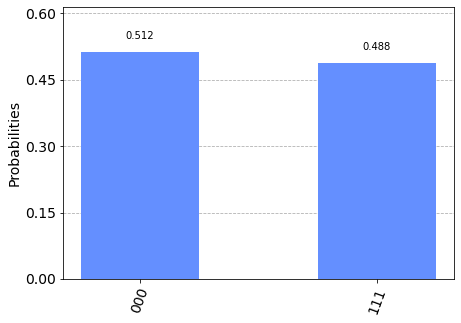

In [8]:
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
for i in range(3):
    qc.measure(i, i)
qc.draw(output="mpl")

count_num = get_count(qc)
print(count_num)
plot_histogram(count_num)